# Tutorial 10: PINN Exercise

We will try to model this physical system.

<div style="text-align: center; margin:2rem;">
    <img src="oscillator.gif">
    <br>
    <small>*source: <a href="https://benmoseley.blog/my-research/so-what-is-a-physics-informed-neural-network/">https://benmoseley.blog/my-research/so-what-is-a-physics-informed-neural-network/</a></small>
</div>

This system is described by the following relation:

<div style="text-align: center; margin:2rem; background-color:white;">
    <img src="oscillator-eqn.svg" height="100px">
</div>



## 1. Define the system parameters and exact solution (for model evaluation and visualization)

#### Import necessary Libraries (*this is complete*)

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

#### Define system parameters (*this is complete*)

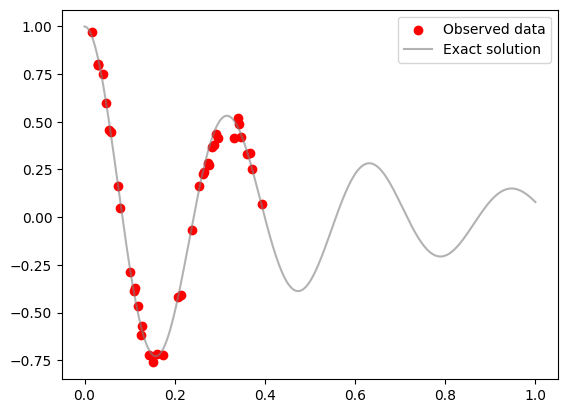

In [3]:
# System model
def exact_solution(d, w0, t):
    w = np.sqrt(w0**2 - d**2)
    phi = np.arctan(-d/w)
    A = 1/(2*np.cos(phi))
    cos = torch.cos(phi+w*t)
    exp = torch.exp(-d*t)
    u = exp*2*A*cos
    return u


# Create noisy observations
torch.manual_seed(123)
d = 2
w0 = 20
k = w0**2
t_obs = torch.rand(40).view(-1, 1) * 0.4
u_obs = exact_solution(d, w0, t_obs) + 0.04 *torch.randn_like(t_obs)

t_test = torch.linspace(0, 1, 300).view(-1, 1)
u_exact = exact_solution(d, w0, t_test)

# plot the data
def plot_observed_data():
    plt.scatter(t_obs, u_obs, label='Observed data', color='red')
    plt.plot(t_test, u_exact, label='Exact solution', color='grey', alpha=0.6)
    plt.legend()
    plt.show()

plot_observed_data()

## 2. Neural Network model

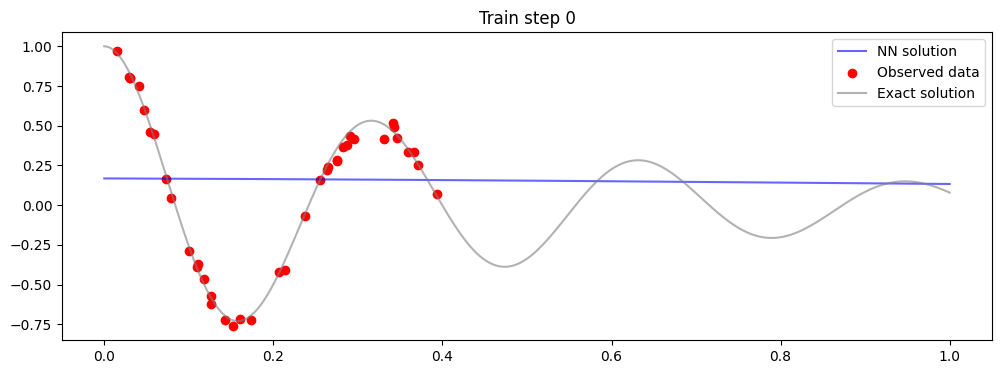

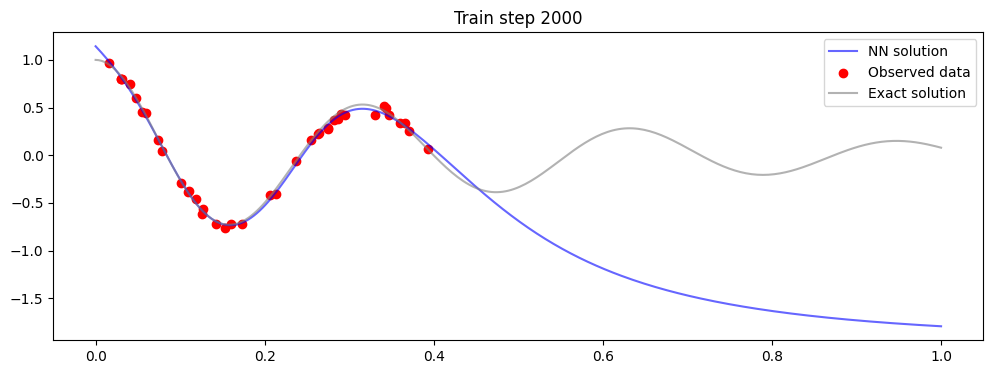

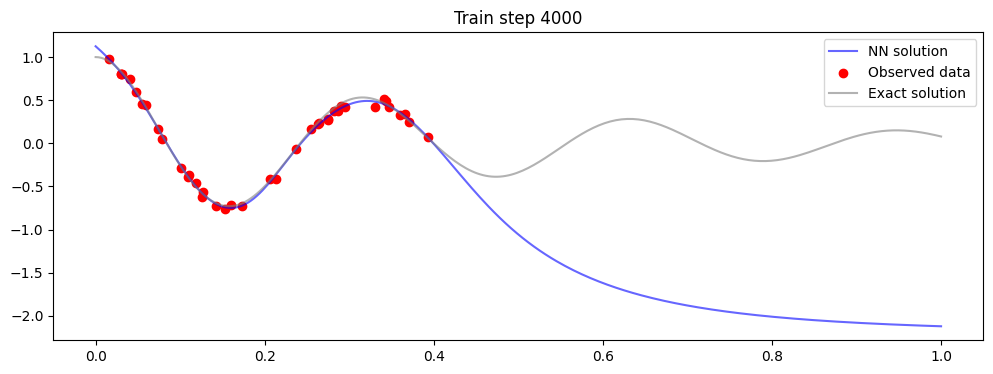

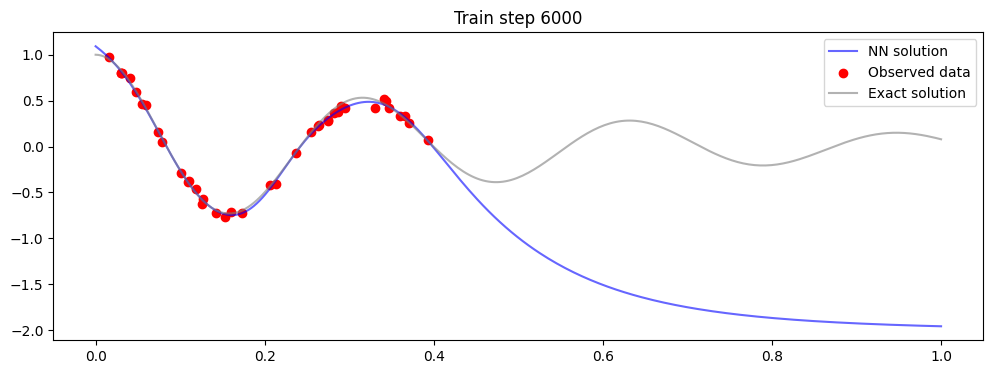

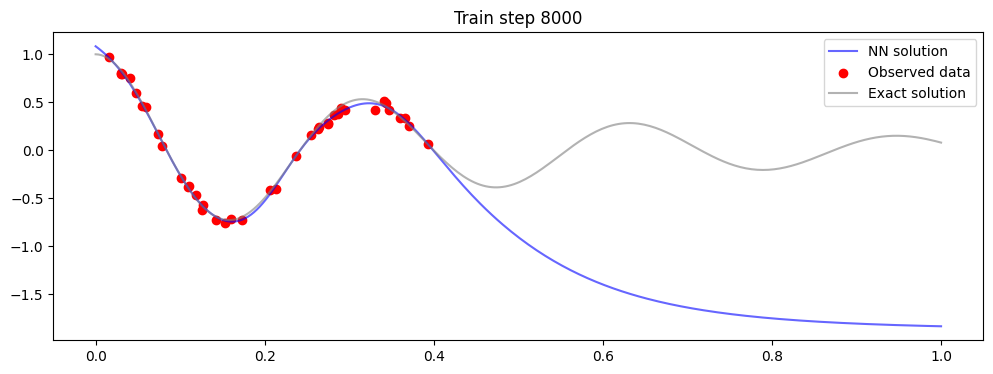

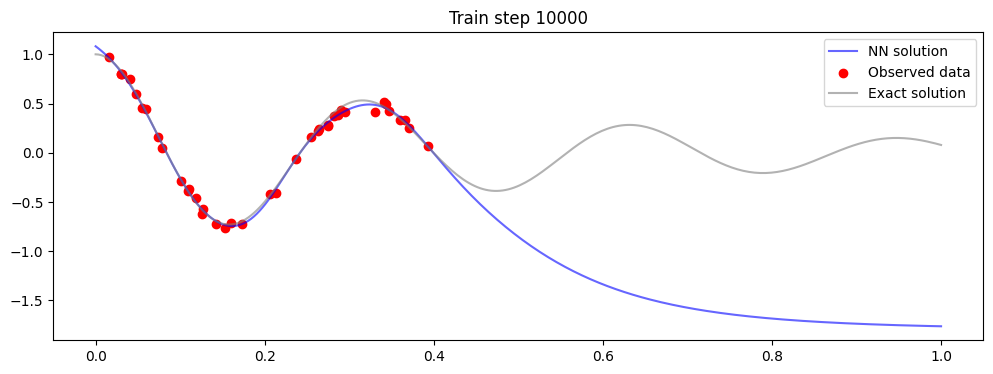

In [4]:
# create neural network class
class NN(nn.Module):
    def __init__(self, n_input, n_output, n_hidden, n_layers, act_fn=nn.Tanh()):
        super().__init__()
        self.act_fn = act_fn

        # create the first hidden layer connected to the inputs
        self.nn_start = nn.Sequential(nn.Linear(n_input, n_hidden), act_fn)

        # create the rest of the hidden layers
        self.nn_hidden = nn.Sequential(*[nn.Sequential(nn.Linear(n_hidden, n_hidden), act_fn) for _ in range(n_layers-1)])

        # create the output layer
        self.nn_end = nn.Linear(n_hidden, n_output)


    # define the forward pass of the network
    def forward(self, x):
        x = self.nn_start(x)
        x = self.nn_hidden(x)
        x = self.nn_end(x)
        return x

    # define the fit method
    def fit(self, X, y, n_epochs, lr=0.01):

        # define the optimizer and the loss function
        optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        loss_fn = nn.MSELoss()

        # train the model
        for epoch in range(n_epochs+1):
            # 1. reset the gradients back to zero
            optimizer.zero_grad()

            # 2. compute the output prediction
            y_pred = self(X)

            # 3. compute the loss
            loss = loss_fn(y_pred, y)

            # 4. backpropagate the loss
            loss.backward()

            # 5. update the weights
            optimizer.step()

            # plot the result as training progresses
            if epoch % 2000 == 0:
                y_pred = self.forward(t_test).detach()
                plt.figure(figsize=(12, 4))
                plt.title(f'Train step {epoch}')
                plt.plot(t_test[:,0], y_pred[:,0], label='NN solution', color='blue', alpha=0.6)
                plot_observed_data()


# TODO: create an instance of the NN class and train it
# create a neural network instance
model_nn = NN(1, 1, 10, 2)

# train the NN
model_nn.fit(t_obs, u_obs, 10000, lr=0.001)



## 3. PINN model

In [5]:
# create neural network class
class PINN(nn.Module):
    # define the class constructor
    def __init__(self, n_input, n_output, n_hidden, n_layers, act_fn=nn.Tanh()):
        super().__init__()
        # TODO: define the network architecture


    # define the forward pass of the network
    def forward(self, x):
        # TODO: define the forward pass
        pass # remove this line when you implement your code


    # define the fit method
    def fit(self, X, y, n_epochs, lr=0.01):

        # TODO: define the optimizer and loss function

        # TODO: define the physical parameters (i.e. range, and regularization parameters)

        # train the model
        for epoch in range(n_epochs + 1):
            # TODO: implement steps for training the model including the physics-informed loss

            # plot the result as training progresses
            if epoch % 5000 == 0:
                y_pred = self.forward(t_test).detach()
                plt.figure(figsize=(12, 4))
                plt.title(f'Train step {epoch}')
                plt.plot(t_test[:,0], y_pred[:,0], label='PINN solution', color='blue', alpha=0.6)
                plot_observed_data()

# TODO: create an instance of the PINN class and train it


<hr style="margin-top: 4rem;">
<h2>Author</h2>

<a href="https://github.com/SamerHany">Samer Hany</a>

<h2>References</h2>

* https://benmoseley.blog/my-research/so-what-is-a-physics-informed-neural-network/  
* https://medium.com/@theo.wolf/physics-informed-neural-networks-a-simple-tutorial-with-pytorch-f28a890b874a